In [ ]:
#importing required libraries

In [2]:

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

1. Load the two folders USF old and USF new to the environment
2. Create a label for each folder(USF old as old) and (USF new as new)


In [3]:
# path of the old logo's directory
old_path=r"C:\Users\sachi\Desktop\Assignment5\old"

In [5]:
# path of the old logo's directory
new_path=r"C:\Users\sachi\Desktop\Assignment5\new"

In [6]:
#loaded old logos
old_ls=[]
for i in os.listdir(old_path):
    old_ls.append(r"C:\Users\sachi\Desktop\Assignment5\old"+'\\'+i)

In [7]:
new_ls=[]

In [8]:
##loaded new logos
for i in os.listdir(new_path):
    new_ls.append(r"C:\Users\sachi\Desktop\Assignment5\new"+'\\'+i)

In [9]:
##This is the way we can label the folder using python although i did it manually.
os.rename(r"C:\Users\sachi\Desktop\Assignment5\old", r"C:\Users\sachi\Desktop\Assignment5\old")
os.rename(r"C:\Users\sachi\Desktop\Assignment5\new", r"C:\Users\sachi\Desktop\Assignment5\new")

In [10]:
##shuffled the logos randomly
random.shuffle(old_ls)
random.shuffle(new_ls)

In [11]:
##Created all data set to use in further processing
data=old_ls+new_ls

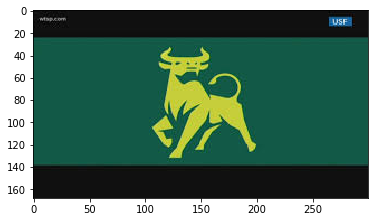

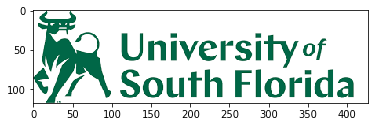

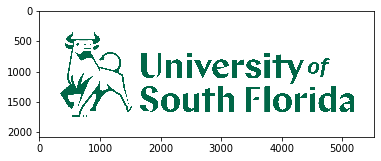

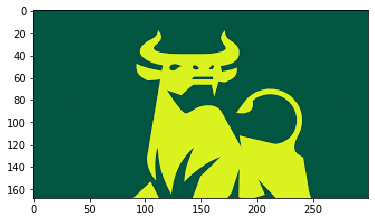

In [12]:
##Visualization of afew logos
import matplotlib.image as pimg
import matplotlib.pyplot as plt
for image in data[0:4]:
    img=pimg.imread(image )
    imgpl=plt.imshow(img)
    plt.show()


3. Resize the images to one size for model input


In [1]:
#Dimensions for resizing
n_r=150
n_c=150
ch=3

In [2]:
##Function to create features and labels for stratified sampling
def process_image(images):
    x=[]
    y=[]
    for image in images:
        x.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(n_r,n_c),interpolation=cv2.INTER_CUBIC)) ##Resize##pixel values of images
        if "old" in image: ##lbelling old logos as 0
            y.append(0)
            
        elif "new" in image: ##lbelling new logos as 0
            y.append(1)
    return x,y
       
            

In [3]:
##Features in X and target in y
X,y=process_image(data)

NameError: name 'data' is not defined

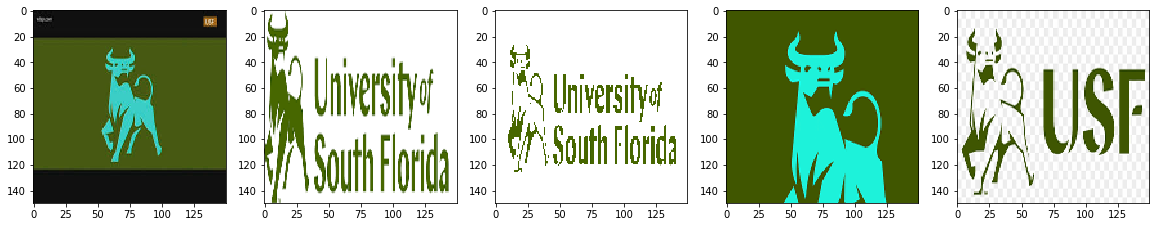

In [18]:
##Plotting the pixels stored in X
plt.figure(figsize=(20,10))
c=5
for i in range(c):
    plt.subplot(5/c + 1, c, i+1)
    plt.imshow(X[i])

In [19]:
## Feature and target variable to array for train test split
X=np.array(X)
y=np.array(y)

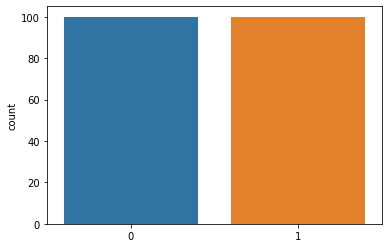

In [20]:
##count of old and new logos in target variable y
import seaborn as sns
sns.countplot(y)


In [21]:
print(X.shape),
print(y.shape)

(200, 150, 150, 3)
(200,)


4. Create a stratified split based on the labels(80:20 split)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 150, 150, 3)
(40, 150, 150, 3)
(160,)
(40,)


5. Normalize the data



In [24]:

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

6. Reshape the input data to a tensor(4d) for CNN 

In [25]:
batch_size=32

train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size,
    seed=42)

In [26]:

val_generator = val_datagen.flow(
    X_test,y_test,
    batch_size=batch_size,
    seed=42)

7. Build a CNN Classifier model and improve it by tuning the hyper parameters


### model:A

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150,150,3)))
model.add(Activation('relu'))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

# initiate adam optimizer
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.00001)

# Let's train the model using RMSprop
#model.compile(loss='categorical_crossentropy',
#              optimizer=opt, metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        3

In [29]:
model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs=20,
        validation_data=val_generator,
        validation_steps=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
5/5 [==============================] - 5s 1s/step - loss: 0.6668 - accuracy: 0.5875 - val_loss: 0.6268 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 5s 965ms/step - loss: 0.5812 - accuracy: 0.7563 - val_loss: 0.5822 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 5s 958ms/step - loss: 0.5351 - accuracy: 0.8000 - val_loss: 0.5490 - val_accuracy: 0.7000
Epoch 4/20
5/5 [==============================] - 5s 1s/step - loss: 0.4863 - accuracy: 0.7688 - val_loss: 0.5208 - val_accuracy: 0.7000
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.4683 - accuracy: 0.7500 - val_loss: 0.4993 - val_accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.4496 - accuracy: 0.7875 - val_loss: 0.4757 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 5s 1s/step - loss: 0.3960 - accuracy: 0.7937 -

5/5 [==============================] - 6s 1s/step - loss: 0.2639 - accuracy: 0.9125 - val_loss: 0.3161 - val_accuracy: 0.9250
Epoch 18/20
5/5 [==============================] - 5s 1s/step - loss: 0.2750 - accuracy: 0.9062 - val_loss: 0.3012 - val_accuracy: 0.9000
Epoch 19/20
5/5 [==============================] - 5s 1s/step - loss: 0.2317 - accuracy: 0.9125 - val_loss: 0.2898 - val_accuracy: 0.9000
Epoch 20/20
5/5 [==============================] - 5s 1s/step - loss: 0.2463 - accuracy: 0.9000 - val_loss: 0.2895 - val_accuracy: 0.9500


### model B

In [33]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(150,150,3)))
model2.add(Activation('relu'))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))

model2.add(Flatten())

model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(rate=0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.summary()


# optimizers
from tensorflow.keras import optimizers

#opt = optimizers.Adam(lr=0.00001)
opt=optimizers.RMSprop(lr=0.0001)
#opt=optimizers.Adadelta(lr=0.0001)
#opt=optimizers.SGD(lr=0.0001)

# Let's train the model using RMSprop
#model.compile(loss='categorical_crossentropy',
#              optimizer=opt, metrics=['accuracy'])
model2.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 73, 73, 64)       

In [34]:
history=model2.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs=20,
        validation_data=val_generator,
        validation_steps=5)

Epoch 1/20
5/5 [==============================] - 7s 1s/step - loss: 2.8336 - accuracy: 0.5000 - val_loss: 0.6571 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.8249 - accuracy: 0.6375 - val_loss: 0.7180 - val_accuracy: 0.6250
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.6181 - accuracy: 0.7125 - val_loss: 0.5064 - val_accuracy: 0.8250
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.6810 - accuracy: 0.6875 - val_loss: 0.4959 - val_accuracy: 0.8500
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.5546 - accuracy: 0.7312 - val_loss: 0.4625 - val_accuracy: 0.9000
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.3357 - accuracy: 0.8500 - val_loss: 0.4121 - val_accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.5613 - accuracy: 0.7812 - val_loss: 0.4278 - val_accuracy: 0.9000
Epoch 8/20
5/5 [=========================

Epoch 18/20
5/5 [==============================] - 7s 1s/step - loss: 0.0505 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 19/20
5/5 [==============================] - 6s 1s/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 1.0000
Epoch 20/20
5/5 [==============================] - 6s 1s/step - loss: 0.0417 - accuracy: 0.9937 - val_loss: 0.1269 - val_accuracy: 0.9750


### model C

In [30]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', input_shape=(150,150,3)))
model1.add(Activation('relu'))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))

model1.add(Flatten())

model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(rate=0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.summary()

# initiate adam optimizer
from tensorflow.keras import optimizers

#opt = optimizers.Adam(lr=0.00001)
opt=optimizers.RMSprop(lr=0.0001)
#opt=optimizers.Adadelta(lr=0.0001)
#opt=optimizers.SGD(lr=0.0001)

# Let's train the model using RMSprop
#model.compile(loss='categorical_crossentropy',
#              optimizer=opt, metrics=['accuracy'])
model1.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 64)       

In [31]:
model1.fit_generator(
        train_generator,
        steps_per_epoch=4,
        epochs=9,
        validation_data=val_generator,
        validation_steps=5)

Epoch 1/9
4/4 [==============================] - 5s 1s/step - loss: 2.5864 - accuracy: 0.5234 - val_loss: 0.6259 - val_accuracy: 0.6250
Epoch 2/9
4/4 [==============================] - 4s 1s/step - loss: 0.6964 - accuracy: 0.5859 - val_loss: 0.5714 - val_accuracy: 0.8000
Epoch 3/9
4/4 [==============================] - 5s 1s/step - loss: 0.6817 - accuracy: 0.6641 - val_loss: 0.5711 - val_accuracy: 0.8000
Epoch 4/9
4/4 [==============================] - 5s 1s/step - loss: 0.5300 - accuracy: 0.7812 - val_loss: 0.5045 - val_accuracy: 0.8000
Epoch 5/9
4/4 [==============================] - 5s 1s/step - loss: 0.4257 - accuracy: 0.8359 - val_loss: 0.4782 - val_accuracy: 0.8750
Epoch 6/9
4/4 [==============================] - 5s 1s/step - loss: 0.6344 - accuracy: 0.6953 - val_loss: 0.5030 - val_accuracy: 0.7500
Epoch 7/9
4/4 [==============================] - 5s 1s/step - loss: 0.4548 - accuracy: 0.7891 - val_loss: 0.4186 - val_accuracy: 0.9000
Epoch 8/9
4/4 [==============================] -

8. Explain what every layer does why was it constructed the way it is?
Ans: We are basicaaly buidilng a sequencial stack of different layers by using sequencial() method, 
        First wecreate by calling the .add() function, and pass the type of layer we want: 
        First Conv2D layer: It is called input layer and parameters to this layers are: 
            filter size: number of output filters in convolution. 
            kernel_size: height and width of 2 dimesnsional convolution window. 
            activation function: we use activation function such as relu, sigmoid, eLu 
            input shape: according to shape of our input(Resized image) with number of channels.
         MaxPool2D layer: It is used to reduce to shrink the size of incoming features, this helps  reduce the parameters and computation.
         Dropout layer: randomly drops some weights, and learn with reduced network, this helps avoid overfitting.
         Flatten:This layer converts all the incoming data to one dimension and prepares data for the input in dense layer.
         Dense: This layer has all nodes connected to all inputs.
         Sigmoid: Sigmoid activation function is good for predicting binary outcomes, as this predicts between 0 and 1.
        
            
            
    


9. Evaluate CNN using F1 score values and accuracy(only for the best model)



In [95]:
## After trying different combination of number of filters,optimizers, learning rates and steps, the Best model is model2 in terms of accuracy.
y_pred=model2.predict(X_test)
from tensorflow.keras import models

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 6.523592948913574
Test accuracy: 0.949999988079071


In [40]:
import sklearn
from sklearn.metrics import f1_score

In [96]:
print("f1-score for the model is:", sklearn.metrics.f1_score(y_test,np.round(y_pred)))

f1-score for the model is: 0.9743589743589743


10. Plot the learning curves for Model accuracy and Model loss

In [ ]:
a=history.history['accuracy']
v_a=history.history['val_accuracy']
l=history.history['loss']
v_l=history.history['val_loss']
e=range(1,len(a)+1)
plt.plot(e,a,'b',label="Training acuuracy")
plt.plot(e,v_a,'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

In [47]:
a=history.history['accuracy']

In [48]:
v_a=history.history['val_accuracy']

In [49]:
l=history.history['loss']

In [50]:
v_l=history.history['val_loss']

In [51]:
e=range(1,len(a)+1)

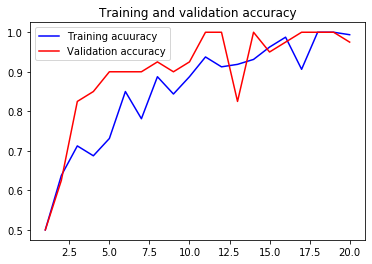

In [52]:
plt.plot(e,a,'b',label="Training acuuracy")
plt.plot(e,v_a,'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

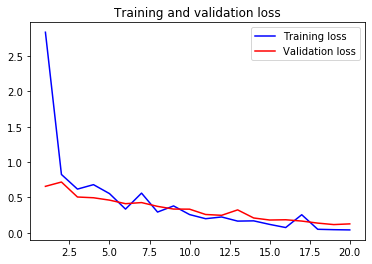

In [53]:
plt.plot(e,l,'b',label="Training loss")
plt.plot(e,v_l,'r',label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

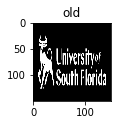

In [84]:
##Plotting the pixels stored in X_test[0]
plt.figure(figsize=(20,10))
c=1
for i in range(c):
    plt.subplot(5/c + 1, c, i+1)
    plt.imshow(X_test[i])
    plt.title("old")

In [102]:
##Prediction for X_test[0]:
if model2.predict(np.round(X_test[0:1]))==0:
    print("This is the old logo of usf")

This is the old logo of usf


In [ ]:
#old=0, new=1
##displayed image byX[0] is predicted correctly as old logo.

In [5]:
from sklearn.metrics import classification_report

In [4]:
names=['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush','Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair','Dr Balaji']